<a href="https://colab.research.google.com/github/campeone-pixel/soccer_database/blob/master/ProyectoDS_ParteI_%2BCannoni%2BPoses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import sqlite3
import pandas as pd
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
# df_games = pd.read_csv("games.csv")
# df_teams = pd.read_csv("teams.csv")
# df_teamstats = pd.read_csv("teamstats.csv")
# df_leagues = pd.read_csv("leagues.csv")
# df_appearances = pd.read_csv("appearances.csv")
# df_players = pd.read_csv("players.csv", encoding="ISO-8859-1")
# df_shots = pd.read_csv("shots.csv")


df_games = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/originales/games.csv")
df_teams = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/originales/teams.csv")
df_teamstats = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/originales/teamstats.csv")
df_leagues = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/originales/leagues.csv")
df_appearances = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/originales/appearances.csv")
df_players = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/originales/players.csv", encoding="ISO-8859-1")
df_shots = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/originales/shots.csv")

# Organizamos las tablas

## Primero mergeamos las tablas de df_leagues,df_teams y df_teamstats con df_games

In [154]:
df_teamstats_away = df_teamstats.loc[df_teamstats["location"] == "a"]
df_teamstats_home = df_teamstats.loc[df_teamstats["location"] == "h"]
df_teamstats_merged = pd.merge(
    df_teamstats_home, df_teamstats_away, on="gameID", suffixes=["_home", "_away"]
)

df_games_merged_with_teamstats = pd.merge(
    df_games, df_teamstats_merged, on="gameID", suffixes=("", "_remove")
)
df_games_merged_with_teamstats = df_games_merged_with_teamstats.drop(
    df_games_merged_with_teamstats.iloc[:, 13:34], axis=1
)
df_games_merged_with_teamstats = df_games_merged_with_teamstats.drop(
    ["homeProbability", "drawProbability", "awayProbability"], axis=1
)
df_games_merged_with_teamstats = df_games_merged_with_teamstats.drop(
    ["teamID_home", "teamID_away"], axis=1
)

df_games_merged_with_leagues = pd.merge(
    df_games_merged_with_teamstats, df_leagues, on="leagueID"
)

df_games_merged_with_team = pd.merge(
    df_games_merged_with_leagues,
    df_teams,
    left_on=["homeTeamID"],
    right_on=["teamID"],
    how="left",
)
df_games_merged_with_team = pd.merge(
    df_games_merged_with_team,
    df_teams,
    left_on=["awayTeamID"],
    right_on=["teamID"],
    how="left",
)

df_f_game = df_games_merged_with_team.rename(
    columns={"name_x": "liga", "name_y": "home_name", "name": "away_name"}
)
df_f_game = df_f_game.drop(
    [
        "understatNotation",
        "season_home",
        "date_home",
        "location_home",
        "goals_away",
        "goals_home",
        "season_away",
        "date_away",
        "location_away",
        "location_away",
        "teamID_x",
        "teamID_y",
    ],
    axis=1,
)



df_appearances_merged_with_players = pd.merge(
    df_appearances, df_players, on="playerID", suffixes=("", "_remove"))

df_f_game.to_csv("df_f_game.csv")
df_f_game['month'] = pd.DatetimeIndex(df_f_game['date']).month

<AxesSubplot: ylabel='gameID'>

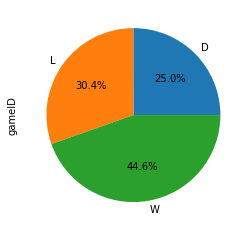

In [155]:
df_f_game.groupby(['result_home'])['gameID'].count().plot(kind = "pie",autopct='%1.1f%%')

<AxesSubplot: xlabel='season'>

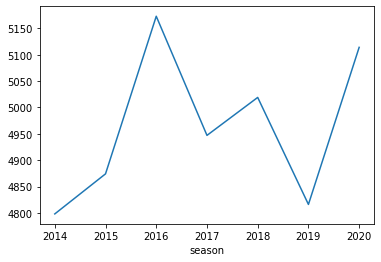

In [156]:
df_f_game["totalGoals"]= df_f_game["homeGoals"]  + df_f_game["awayGoals"]
df_f_game["goal_diff"]= abs(df_f_game["homeGoals"]  - df_f_game["awayGoals"])

df_f_game["diff_labels"]= df_f_game['goal_diff'].apply(lambda x: str(x) if x<4 else '4 o mas' )

df_f_game.groupby(['season'])['totalGoals'].sum().plot()


<AxesSubplot: xlabel='liga,season'>

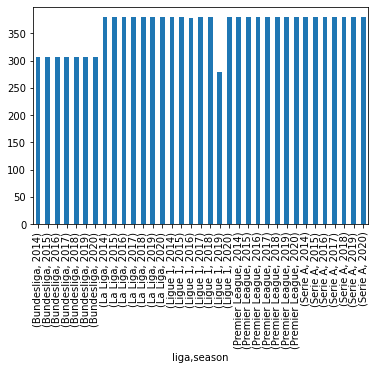

In [157]:
df_f_game.groupby(['liga','season'])['gameID'].count().plot(kind='bar')

<AxesSubplot: xlabel='month', ylabel='Count'>

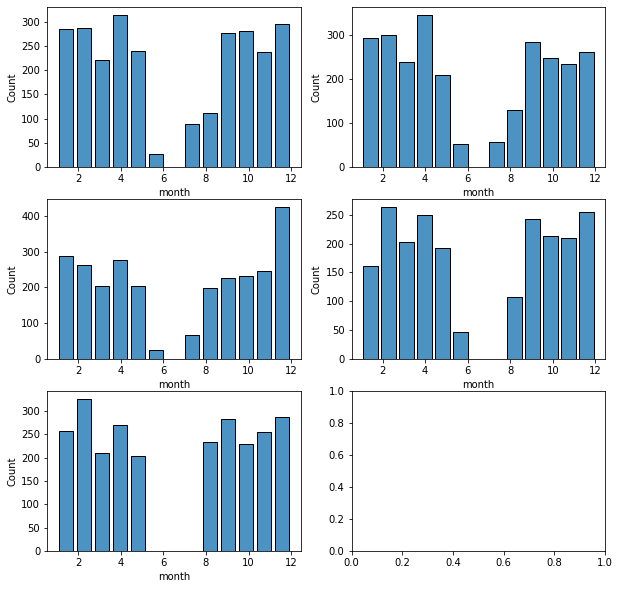

In [158]:
df_f_game_seriea=df_f_game.loc[df_f_game['liga']=="Serie A"]
df_f_game_laliga=df_f_game.loc[df_f_game['liga']=="La Liga"]
df_f_game_premier=df_f_game.loc[df_f_game['liga']=="Premier League"]
df_f_game_bundesliga=df_f_game.loc[df_f_game['liga']=="Bundesliga"]
df_f_game_ligue1=df_f_game.loc[df_f_game['liga']=="Ligue 1"]

figure, axis = plt.subplots(3, 2, figsize=(10, 10))

sns.histplot(data=df_f_game_seriea, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[0,0])
sns.histplot(data=df_f_game_laliga, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[0,1])
sns.histplot(data=df_f_game_premier, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[1,0])
sns.histplot(data=df_f_game_bundesliga, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[1,1])
sns.histplot(data=df_f_game_ligue1, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[2,0])


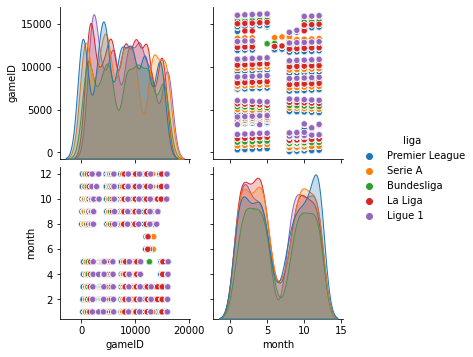

In [159]:
data=df_f_game.loc[:,["gameID","month","liga"]]
sns.pairplot(data=data, hue="liga")


## Mergeamos las tablas de df_apperances,df_shots y df_players

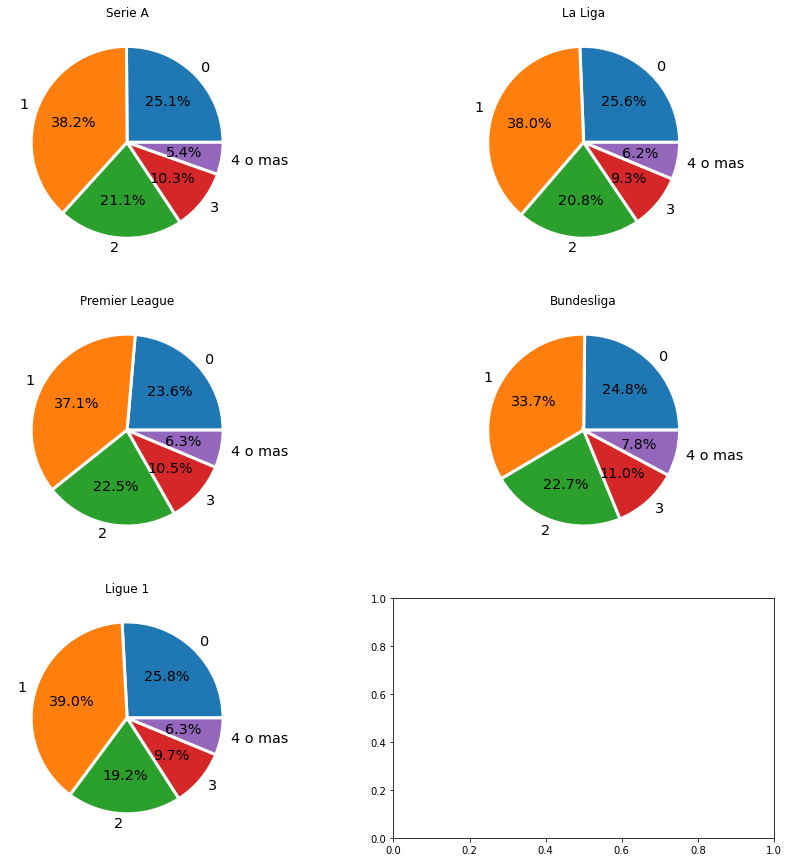

In [160]:

x_seriea=df_f_game_seriea.groupby(['diff_labels'])['gameID']
x_laliga=df_f_game_laliga.groupby(['diff_labels'])['gameID']
x_premier=df_f_game_premier.groupby(['diff_labels'])['gameID']
x_bundesliga=df_f_game_bundesliga.groupby(['diff_labels'])['gameID']
x_ligue1=df_f_game_ligue1.groupby(['diff_labels'])['gameID']




fig, ax = plt.subplots(3, 2, figsize=(15, 15))
autopct='%.1f%%'
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}
textprops={'size': 'x-large'}
ax[0,0].pie(x_seriea.count(),labels= x_seriea.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[0,1].pie(x_laliga.count(),labels= x_laliga.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[1,0].pie(x_premier.count(),labels= x_premier.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[1,1].pie(x_bundesliga.count(),labels= x_bundesliga.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[2,0].pie(x_ligue1.count(),labels= x_ligue1.groups.keys(), autopct=autopct,wedgeprops=wedgeprops,
    textprops=textprops)
ax[0,0].set_title('Serie A')
ax[0,1].set_title('La Liga')
ax[1,0].set_title('Premier League')
ax[1,1].set_title('Bundesliga')
ax[2,0].set_title('Ligue 1')
plt.show()

c:\Users\Mati\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<BarContainer object of 22 artists>

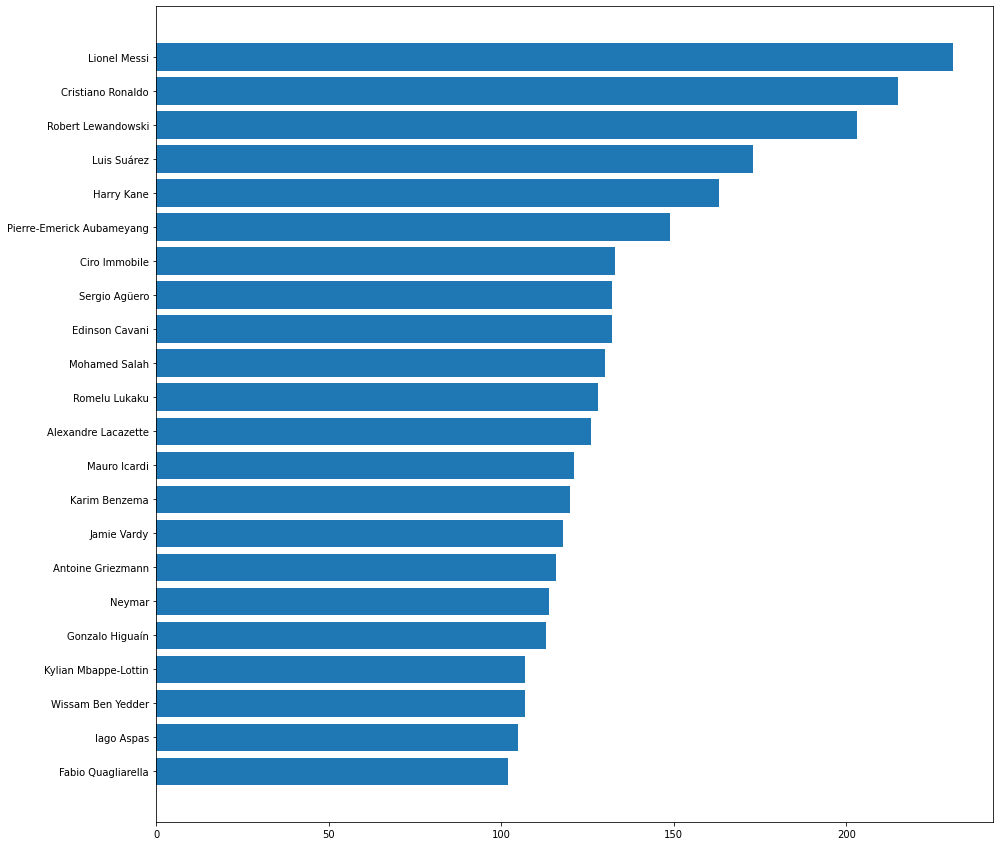

In [161]:
# df_games 
# df_teams 
# df_teamstats 
# df_leagues 
# df_appearances 
# df_players
# df_shots 

df_p_app= pd.merge(
    df_appearances,
    df_players,
    left_on=["playerID"],
    right_on=["playerID"],
    how="left",
)


df_p_app= pd.merge(
    df_p_app,
    df_games[['gameID','season']],
    on='gameID',
    how="left",
)
df_prob_stats= pd.merge(
    df_p_app[["gameID","goals","playerID","xGoals","xGoalsChain","xGoalsBuildup","xAssists",'season']],
    df_players[['name',"playerID"]],
    left_on=["playerID"],
    right_on=["playerID"],
    how="left",
)

df_prob_stats= df_prob_stats[['gameID','season','name', 'playerID', 'goals', 'xGoals', 'xGoalsChain', 'xGoalsBuildup',
       'xAssists' ]]


grouped_goal_total=df_prob_stats.groupby(["name"],as_index=False)["goals"].sum()

mas_de_100=grouped_goal_total.loc[grouped_goal_total['goals']>100]
mas_de_100.sort_values(by='goals',inplace=True )

fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(list(mas_de_100["name"])  ,  list(mas_de_100['goals'])  )

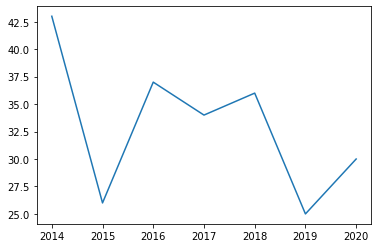

In [163]:
df_filtered=df_prob_stats[df_prob_stats['name'].isin(mas_de_100['name'])]
df_filtered=df_filtered.groupby(["name",'season'],as_index=False)["goals"].sum()
df_filtered.sort_values(by=['season',"name"],inplace=True)



fig1, ax1 = plt.subplots()

ax1.plot(df_filtered[df_filtered['name'].str.contains("Lionel Messi")].season,   df_filtered[df_filtered['name'].str.contains("Lionel Messi")].goals, label=df_filtered[df_filtered['name'].str.contains("Lionel Messi")].name)
